# COVID-19 Genome Analysis using BioPython

## Fetch COVID-19 Genome from NCBI

`MN908947` - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26th December 2019

https://www.rcsb.org/news/feature/5e74d55d2d410731e9944f52

In [2]:
from Bio import Entrez, SeqIO

In [ ]:
Entrez.email = ""

In [4]:
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode='text')
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [5]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

## COVID-19 DNA

In [6]:
covid_dna = recs[0].seq
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

## Number of Nucleotides in COVID-19

In [7]:
print(f"The genome of Covid-19 consists of {len(covid_dna)} nucleotides")

The genome of Covid-19 consists of 29903 nucleotides


## Molecular Weight

In [8]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214399999

## GC Content

In [9]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import gc_fraction
gc_fraction(covid_dna)

0.3797277865097147

## Distribution of Nucleotides in COVID-19 Genome

In [10]:
nucleotide_counts = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G'),
}
nucleotide_counts

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shres\AppData\Local\Temp\ipykernel_39724\476853864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=nucleotide_counts.keys(), x=nucleotide_counts.values(), palette="viridis")


Text(0.5, 1.0, 'Nucleotide Frequency')

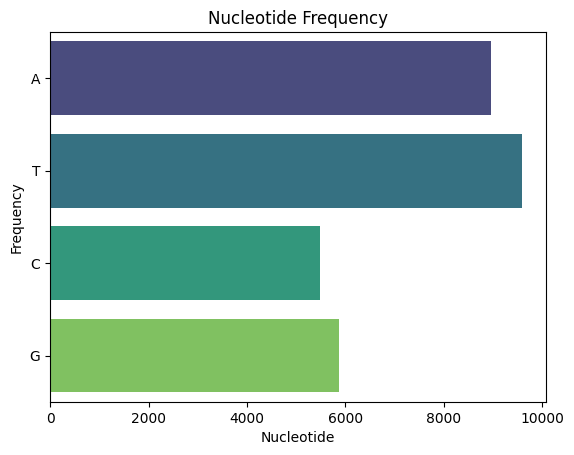

In [12]:
sns.barplot(y=nucleotide_counts.keys(), x=nucleotide_counts.values(), palette="viridis")
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

The frequency of the nucleotides A and T is higher than the frequency of C and G.

Understanding this genetic information is key to finding cures and vaccines. So, the question is: How do we extract information from this long sequence of letters?

This process is called gene expression: Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins.

## Transcription

Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make a RNA molecule

In [13]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

## Translation

Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids

In [14]:
covid_aa = covid_mrna.translate()
covid_aa

c:\Users\shres\Projects\Learning-BioPy\.venv\Lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [15]:
# Most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [16]:
del common_amino['*']   # Remove the stop aa

C:\Users\shres\AppData\Local\Temp\ipykernel_39724\3231350415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_amino.keys(), y=common_amino.values(), palette="viridis")


Text(0.5, 1.0, 'Protein Sequence Frequency')

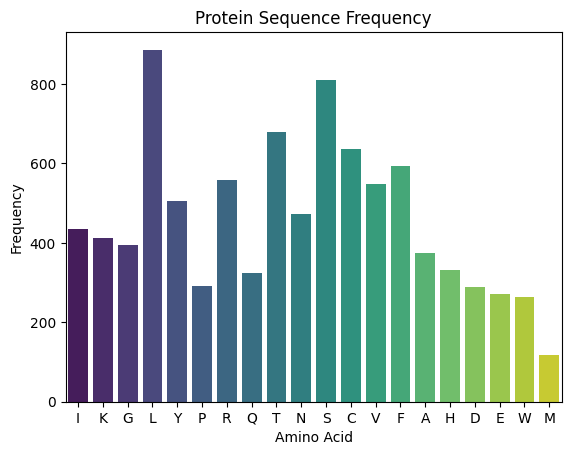

In [17]:
sns.barplot(x=common_amino.keys(), y=common_amino.values(), palette="viridis")
plt.xlabel('Amino Acid')
plt.ylabel("Frequency")
plt.title('Protein Sequence Frequency')

In [18]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


The `split()` function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [19]:
proteins = covid_aa.split('*')
proteins

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('RWHLWLSRS'),
 Seq('KRRFAST'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('AGSRTRRHSVRS'),
 Seq('W'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('ER'),
 Seq(''),
 Seq('RSWWP'),
 Seq('LRRRSKVI'),
 Seq('LRRRAWH'),
 Seq('SL'),
 Seq('RFSRKLEH'),
 Seq('T'),
 Seq('QWCYP'),
 Seq('THA'),
 Seq('A'),
 Seq('RRGIHSLCR'),
 Seq('QLLWP'),
 Seq('WLPS'),
 Seq('VH'),
 Seq('RPSSTCW'),
 Seq('SFMHFVRTTGLY'),
 Seq('H'),
 Seq('EGCILLP'),
 Seq('T'),
 Seq('A'),
 Seq('NCLVHGTF'),
 Seq('KEL'),
 Seq('IADTF'),
 Seq('N'),
 Seq('IGKEI'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('KEKA'),
 Seq('WLYG'),
 Seq('NSICLSSCVTK'),
 Seq('MQPNVPFNSHEV'),
 Seq('SLW'),
 Seq('NFMADGRFC'),
 Seq('SHLRILWH'),
 Seq('EFD'),
 Seq('RRCHYLWLLTPKCCC'),
 Seq('NLLSSMSQFRSRT'),
 Seq('A'),
 Seq('SCRIP'),
 Seq(''),
 Seq('IWLENHSS'),
 Seq('GWSHYCLWRLCVLLCWLP'),

In [20]:
print(f"We have {len(proteins)} amino acids in the covid-19 genome")

We have 775 amino acids in the covid-19 genome


It is worth mentioning that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on chains with more than 20 amino acid chains: Proteins.

In [21]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [22]:
print(f"We are left with {len(proteins)} proteins that have more than 20 amino acids in the Covid-19 Genome")

We are left with 409 proteins that have more than 20 amino acids in the Covid-19 Genome


In [23]:
top_5_proteins = sorted(proteins, key=len)
top_5_proteins

[Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq('T'),
 Seq('T'),
 Seq('H'),
 Seq('C'),
 Seq('T'),
 Seq('H'),
 Seq('W'),
 Seq('W'),
 Seq('W'),
 Seq('Q'),
 Seq('P'),
 Seq('A'),
 Seq('Y'),
 Seq('W'),
 Seq('I'),
 Seq('I'),
 Seq('P'),
 Seq('I'),
 Seq('N'),
 Seq('A'),
 Seq('E'),
 Seq('L'),
 Seq('L'),
 Seq('R'),
 Seq('L'),
 Seq('L'),
 Seq('F'),
 Seq('L'),
 Seq('V'),
 Seq('V'),
 Seq('L'),
 Seq('F'),
 Seq('L'),
 Seq('A'),
 Seq('R'),
 Seq('L'),
 Seq('F'),
 Seq('SL'),
 Seq('VW'),
 Seq('SE'),
 Seq('KF'),
 Seq('DS'),
 Seq('GY'),
 Seq('ET'),
 Seq('II'),
 Seq('FF'),
 Seq('WR'),
 Seq('NV'),
 Seq('KE'),
 Seq('NC'),
 Seq('LY'),
 Seq('YF'),
 Seq('WC'),
 Seq('SL'),
 Seq('TG'),
 Seq('LC'),
 Seq('EV'),
 Se

In [24]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [25]:
len(top_5_proteins[-1])

2701

Let's save this protein to file for further analysis

In [26]:
with open('protein_seq.fasta', 'w') as file:
    file.write(f">Covid Protein\n{top_5_proteins[-1]}")

## Summary of Findings so Far

- Sequence Length: 29,903 base pairs
- GC Content: 37.97%
- Has high amount of Leucine (L) and Serine (S)
- 409 proteins with more than 20 amino acids
- The largest protein is of length 2,701 amino acid

## BLAST Search of COVID

Now that we have obtained the protein sequence, let's now perform the NCBI BLAST search and list the parameters to identify the best aligned sequence.

Using the longest protein sequence from covid genome saved in file

In [27]:
from Bio import SeqIO
protein_seq = SeqIO.read('protein_seq.fasta', 'fasta')

In [28]:
protein_seq.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [29]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast('blastp', 'pdb', protein_seq.seq)    # pdb - protein databank

In [30]:
from Bio import SearchIO
blast_records = SearchIO.read(result_handle, 'blast-xml')

In [31]:
print(blast_records[:10])

Program: blastp (2.17.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|9CGV|A  Chain A, RNA-directed RNA polymerase nsp12 ...
            4      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            5      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...
            6      1  pdb|7BV1|A  Chain A, RNA-directed RNA polymerase [Sever...
            7      1  pdb|7C2K|A  Chain A, RNA-directed RNA polymerase [Sever...
            8      1  pdb|9PYW|A  Chain A, RNA-directed RNA pol

In [32]:
for blast_record in blast_records:
    print(f"Sequence ID: {blast_record.id}")
    print(f"Description: {blast_record.description}")
    print(f"E value: {blast_record[0].evalue}")
    print(f"Bit Score: {blast_record[0].bitscore}")
    print(f"Alignment:\n{blast_record[0].aln}")
    print()

Sequence ID: pdb|7D4F|A
Description: Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value: 0.0
Bit Score: 1938.7
Alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A

Sequence ID: pdb|6YYT|A
Description: Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]
E value: 0.0
Bit Score: 1938.31
Alignment:
Alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6YYT|A

Sequence ID: pdb|6XEZ|A
Description: Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value: 0.0
Bit Score: 1937.92
Alignment:
Alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6XEZ|A

Sequence ID: pdb|9CGV|A
Description: Chain

## Visualization of COVID Protein

We can retrieve the structural file SARS-CoV-2 from another database PDB (Protein Data Bank). PDB database stores protein records that contain coordinate information of each atom, which we will be using to visualize SARS-CoV-2 protein

In [33]:
# id of protein we are searching for
seq_id = "pdb|6YYT|A"

In [34]:
id = seq_id.split("|")[1]   # Extract ID so we can download the PDB file from Protein Data Bank
id

'6YYT'

The Protein Data Bank (PDB) file format is a textual file format describing the three-dimensional structures of molecules held in PDB.

In [35]:
# Invoke-WebRequest -Uri https://files.rcsb.org/download/6YYT.pdb -OutFile 6YYT.pdb in PowerShell
# or
# wget https://files.rcsb.org/download/6YYT.pdb

### Reading PDB file with BioPython

`Bio.PDB` is a BioPython module that focuses on working with crystal structures of biological macromolecules. Among other things, `Bio.PDB` includes a `PDBParser` class that produces a structure object, which can be used to access the atomic data in the file in a convenient manner.

In [8]:
from Bio.PDB.PDBParser import PDBParser

In [9]:
parser = PDBParser()

# After parsing, we can get the protein structure
structure = parser.get_structure('6YYT', '6YYT.pdb')
structure

c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12060.
  warnings.warn(


<Structure id=6YYT>

### Identify the number of chains

In [10]:
for chain in structure[0]:
    print(f"Chain ID: {chain.id}")

Chain ID: A
Chain ID: B
Chain ID: C
Chain ID: D
Chain ID: P
Chain ID: Q
Chain ID: T
Chain ID: U


We see that this viral SARS-CoV-2 polymerase has 8 chains or 8 accessory proteins, represented with a single alphabet.

In [11]:
import nglview as nv

In [12]:
nv.demo()

NGLWidget()

In [13]:
nv.show_biopython(structure, gui=True)

NGLWidget()

Exception in thread Thread-17 (_call):
Traceback (most recent call last):
  File "C:\Users\shres\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\shres\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\nglview\widget.py", line 439, in _call
    callback(self)
    ~~~~~~~~^^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\nglview\widget.py", line 1320, in callback
    widget.send(msg)
    ~~~~~~~~~~~^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packag

In [ ]:
nv.show_biopython(structure)

NGLWidget()

Exception in thread Thread-21 (_call):
Traceback (most recent call last):
  File "C:\Users\shres\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\shres\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\nglview\widget.py", line 439, in _call
    callback(self)
    ~~~~~~~~^^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packages\nglview\widget.py", line 1320, in callback
    widget.send(msg)
    ~~~~~~~~~~~^^^^^
  File "c:\Users\shres\Projects\Learning-BioInformatics\.venv\Lib\site-packag

This is what the 6YYT SARS-CoV-2 protein looks like:

- Two helical strands with different shades of blue color are the RNA template stand and its product strand
- The bulk of red ribbons is the polymerase which is an enzyme (functional protein) that makes copies of the RNA chain. This polymerase is an attractive target for antiviral COVID-19 vaccine
- If we flip the molecule, we can see the yellow and orange ribbons, which are viral proteins that help the polymerase stay on track and copy long portions of the RNA chain